In [1]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.preprocessing  import StandardScaler
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd


In [2]:
data_points = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/KMEM2.csv")

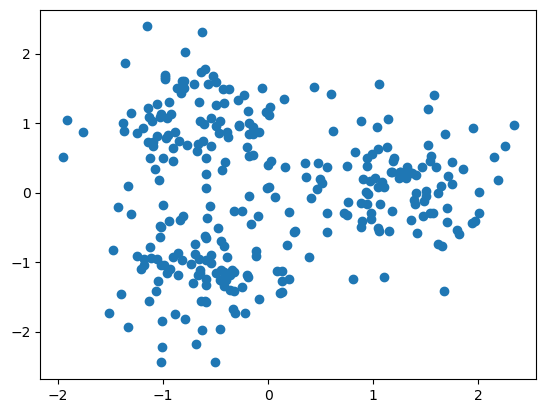

In [3]:
plt.scatter(data_points['x'], data_points['y']);

In [4]:
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(data_points)

In [5]:
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=0).fit(scaled_data)

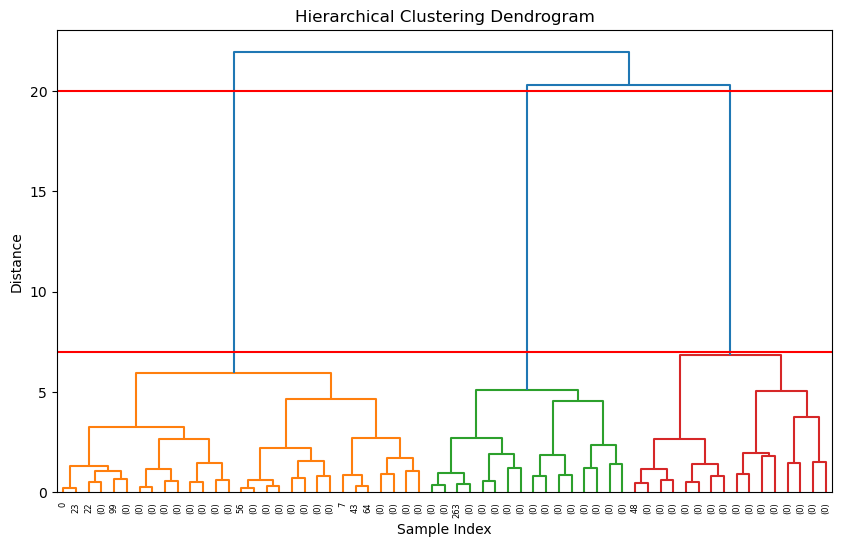

In [6]:
def plot_dendrogram(model, **kwargs):
    linkage_matrix = np.column_stack([model.children_, model.distances_, np.zeros(model.distances_.shape[0])]).astype(float)
    dendrogram(linkage_matrix,**kwargs )
    
plt.figure(figsize=(10, 6))
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(agg_clustering, truncate_mode='level', p=5)
plt.hlines(20, 0, 10000, 'r')
plt.hlines(7, 0, 10000, 'r')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()    

In [7]:
agg_clustering = AgglomerativeClustering(n_clusters=None, distance_threshold=15).fit(scaled_data)
agg_clustering.n_clusters_ = 3
data_points['cluster_label'] = agg_clustering.labels_

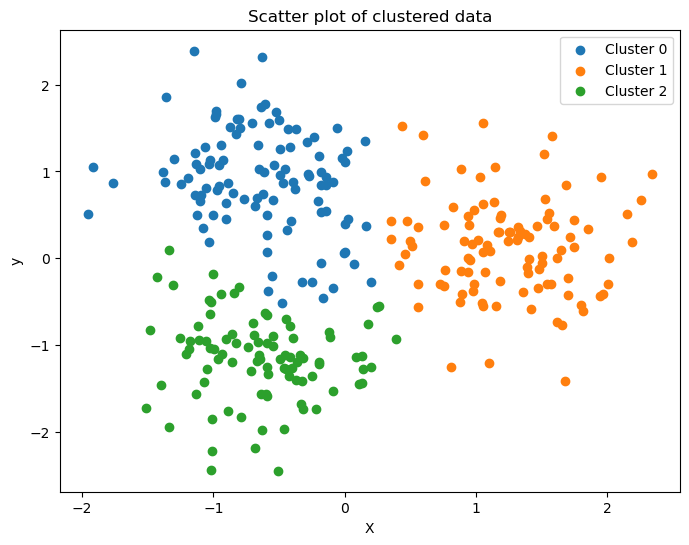

In [8]:
plt.figure(figsize=(8, 6))
labels = np.unique(agg_clustering.labels_)
for cluster_label in labels:
    points = data_points[data_points['cluster_label'] == cluster_label]
    plt.scatter(points.iloc[:, 0], points.iloc[:, 1], label=f'Cluster {cluster_label}')
plt.title('Scatter plot of clustered data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

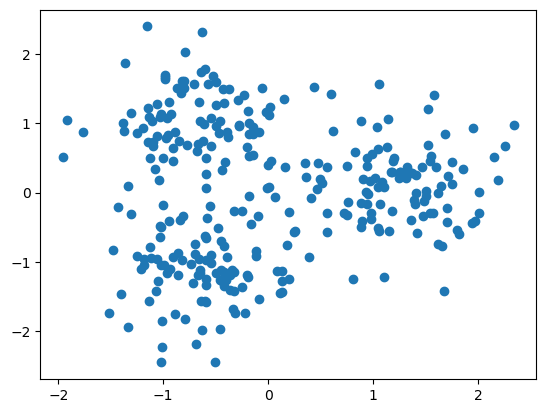

In [9]:
std_scaler = StandardScaler()
scaled_data = std_scaler.fit_transform(data_points[["x","y"]])
data_points[["x","y"]] = scaled_data

plt.scatter(data_points['x'], data_points['y'])
plt.show()